### Importando bibliotecas necessárias

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()

Considerando a seguinte formulação:

<center>

$$Minimize f(\overset{\rightarrow}{x}),\overset{\rightarrow}{x} = [ {x_1},{x_2},{...},{x_n} ]$$

</center>

Subject to:

<center>

$$g_i(\overset{\rightarrow}{x}) \leq 0, i = 1,..., q$$

$$h_j(\overset{\rightarrow}{x}) = 0, j = q+1,..., m$$

</center>

Usually equality constraints are transformed into inequalities of the
form

<center>

$$\left| h_j(\overset{\rightarrow}{x}) \right| - \epsilon \leq 0, for j = q + 1,...,m $$

</center>

A solution $\overset{\rightarrow}{x}$ is regarded as *feasible* if
$g_i(\overset{\rightarrow}{x}) \leq 0$, for j = 1,…,q and
$\left| h_j(\overset{\rightarrow}{x}) \right| - \epsilon \leq 0, for$
$j = q + 1,...,m$. In this special session $\epsilon$ is set to 0.0001.

Implementar um algoritmo baseado em Computação Evolutiva (AG, ES, PE ou
PG) ou Evolução Diferencial (ED) ou Particle Swarm Optimization (PSO)
para resolver os seguintes problemas restritos de otimização:


### 1) Problema com 13 variáveis de decisão ($x_1$ até $x_{13}$ ) e 9 restrições de desigualdade.

g01

$Minimize [1]$:

<center>

$$ f(\overset{\rightarrow}{x}) = 5 \sum_{i=1}^4 x_i - 5 \sum_{i=1}^4 x²_i -  \sum_{i=5}^{13} x_i $$

</center>

subject to:

<center>

$$g_1(\overset{\rightarrow}{x})  =  2x_1 + 2x_2 + x_{10} + x_{11} - 10 \leq 0 $$

$$g_2(\overset{\rightarrow}{x}) = 2x_1 + 2x_3 + x_{10} + x_{12} - 10 \leq 0 $$

$$g_3(\overset{\rightarrow}{x}) = 2x_2 + 2x_3 + x_{11} + x_{12} - 10 \leq 0 $$

$$g_4(\overset{\rightarrow}{x}) = -8x_1 + x_{10} \leq 0 $$

$$g_5(\overset{\rightarrow}{x}) = -8x_2 + x_{11} \leq 0 $$

$$g_6(\overset{\rightarrow}{x}) = -8x_3 + x_{12} \leq 0 $$

$$g_7(\overset{\rightarrow}{x}) = -2x_4 - x_5 + x_{10} \leq 0 $$

$$g_8(\overset{\rightarrow}{x}) = -2x_6 - x_7 + x_{11} \leq 0 $$

$$g_9(\overset{\rightarrow}{x}) = -2x_8 - x_9 + x_{12} \leq 0 $$

</center>

com

<center>

$$0 \leq x \leq 1 (i = 1,...,9), 0 \leq  x_i \leq 100  (i = 10, 11, 12) and 0 \leq  x_{13} \leq 1$$

</center>

### Gráficos e análise dos resultados

#### Lendo os dados

In [16]:
data_a = pd.read_csv("../out/1-results-a.csv")
data_b = pd.read_csv("../out/1-results-b.csv")

In [17]:
data = pd.concat(map(pd.read_csv, ["../out/1-results-a.csv", "../out/1-results-b.csv"]))

# Adicionar uma nova coluna indicando a qual DataFrame antigo pertence cada linha
df_identifiers = ['A'] * len(pd.read_csv("../out/1-results-a.csv")) + ['B'] * len(pd.read_csv("../out/1-results-b.csv"))
data['DataFrame'] = df_identifiers

data

,Objective Function,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,DataFrame
0,-14.458772,0.999819,0.999774,0.992945,0.997344,0.996362,0.997591,0.993392,0.987870,0.995377,2.886051,2.836723,2.818388,0.997328,A
1,-14.640672,0.994456,0.996513,0.999866,0.996346,0.998409,0.997248,0.991709,0.999448,0.996589,2.922905,2.905496,2.894240,0.998441,A
2,-14.506726,0.998862,0.997513,0.995618,0.999880,0.989218,0.992567,0.997547,0.999895,0.984594,2.722251,2.908475,2.955737,0.996952,A
3,-14.489255,0.999907,0.992243,0.996921,0.998398,0.997709,0.999548,0.990493,0.988655,0.997187,2.977670,2.678822,2.921496,0.999966,A
4,-11.875946,0.995765,0.993562,0.999129,0.000384,0.995537,0.993916,0.994170,0.990894,0.997537,0.912192,2.687912,2.365031,0.998096,A
5,-14.553699,0.999674,0.998085,0.998470,0.988857,0.996583,0.989408,0.999602,0.998507,0.996070,2.856441,2.847224,2.946564,0.997216,A
6,-14.569700,0.999419,0.999745,0.991663,0.996636,0.998627,0.999430,0.999771,0.993167,0.992389,2.821010,2.912863,2.916370,0.998347,A
7,-14.374660,0.996972,0.997055,0.997990,0.998759,0.996960,0.999546,0.998218,0.993288,0.988033,2.852042,2.707575,2.885962,0.999043,A
8,-14.493202,0.995406,0.998681,0.998615,0.999337,0.999630,0.997827,0.998608,0.991401,0.994103,2.937107,2.856135,2.764337,0.993731,A
9,-11.613466,0.000765,0.999027,0.996005,0.999356,0.999191,0.999397,0.999271,0.997350,0.998506,0.006120,2.955136,2.697832,0.992460,A


In [18]:
df = pd.DataFrame(data=data)
df

,Objective Function,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,DataFrame
0,-14.458772,0.999819,0.999774,0.992945,0.997344,0.996362,0.997591,0.993392,0.987870,0.995377,2.886051,2.836723,2.818388,0.997328,A
1,-14.640672,0.994456,0.996513,0.999866,0.996346,0.998409,0.997248,0.991709,0.999448,0.996589,2.922905,2.905496,2.894240,0.998441,A
2,-14.506726,0.998862,0.997513,0.995618,0.999880,0.989218,0.992567,0.997547,0.999895,0.984594,2.722251,2.908475,2.955737,0.996952,A
3,-14.489255,0.999907,0.992243,0.996921,0.998398,0.997709,0.999548,0.990493,0.988655,0.997187,2.977670,2.678822,2.921496,0.999966,A
4,-11.875946,0.995765,0.993562,0.999129,0.000384,0.995537,0.993916,0.994170,0.990894,0.997537,0.912192,2.687912,2.365031,0.998096,A
5,-14.553699,0.999674,0.998085,0.998470,0.988857,0.996583,0.989408,0.999602,0.998507,0.996070,2.856441,2.847224,2.946564,0.997216,A
6,-14.569700,0.999419,0.999745,0.991663,0.996636,0.998627,0.999430,0.999771,0.993167,0.992389,2.821010,2.912863,2.916370,0.998347,A
7,-14.374660,0.996972,0.997055,0.997990,0.998759,0.996960,0.999546,0.998218,0.993288,0.988033,2.852042,2.707575,2.885962,0.999043,A
8,-14.493202,0.995406,0.998681,0.998615,0.999337,0.999630,0.997827,0.998608,0.991401,0.994103,2.937107,2.856135,2.764337,0.993731,A
9,-11.613466,0.000765,0.999027,0.996005,0.999356,0.999191,0.999397,0.999271,0.997350,0.998506,0.006120,2.955136,2.697832,0.992460,A


### Geração dos gráficos

In [19]:
# Calcular estatísticas para DataFrame "A"
data_a = data[data['DataFrame'] == 'A']
min_a, max_a, mean_a, std_a = data_a['Objective Function'].min(), data_a['Objective Function'].max(), data_a['Objective Function'].mean(), data_a['Objective Function'].std()

# Calcular estatísticas para DataFrame "B"
data_b = data[data['DataFrame'] == 'B']
min_b, max_b, mean_b, std_b = data_b['Objective Function'].min(), data_b['Objective Function'].max(), data_b['Objective Function'].mean(), data_b['Objective Function'].std()

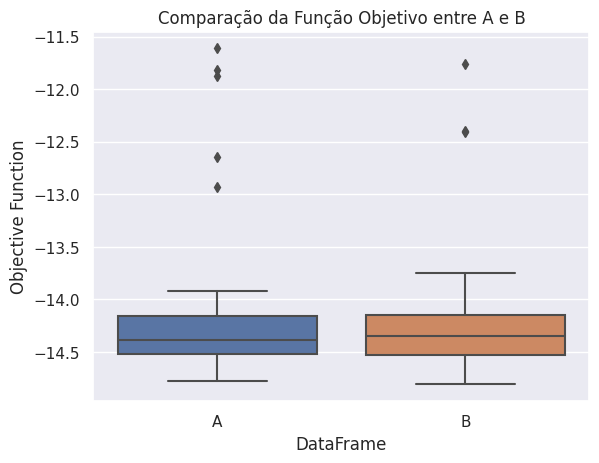

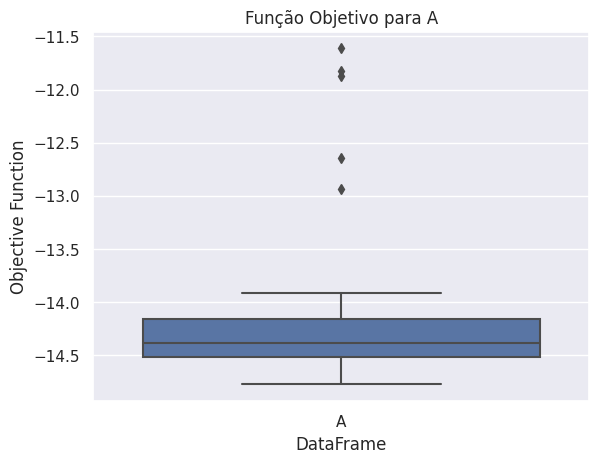

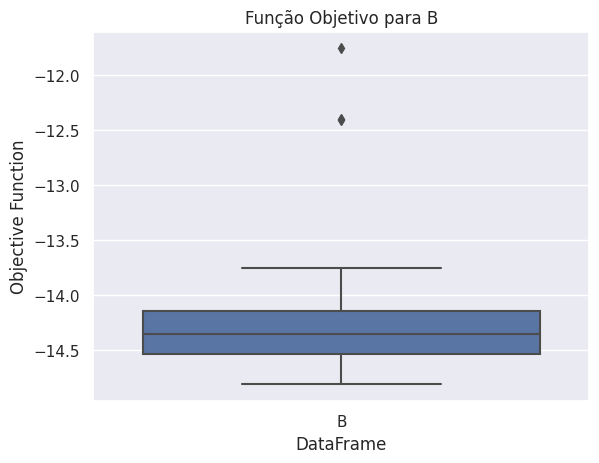

In [20]:
# Gráfico comparando A e B
sns.boxplot(x="DataFrame", y="Objective Function", data=data)
plt.title("Comparação da Função Objetivo entre A e B")
plt.show()

# Gráfico individual para A
sns.boxplot(x="DataFrame", y="Objective Function", data=data[data['DataFrame'] == 'A'])
plt.title("Função Objetivo para A")
plt.show()

# Gráfico individual para B
sns.boxplot(x="DataFrame", y="Objective Function", data=data[data['DataFrame'] == 'B'])
plt.title("Função Objetivo para B")
plt.show()

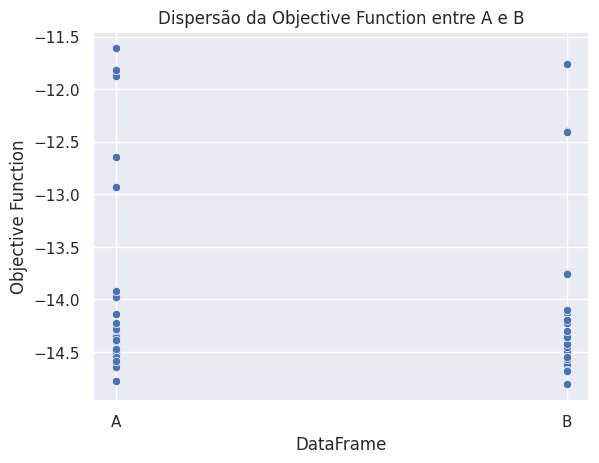

In [21]:
sns.scatterplot(x="DataFrame", y="Objective Function", data=data)
plt.title("Dispersão da Objective Function entre A e B")
plt.show()

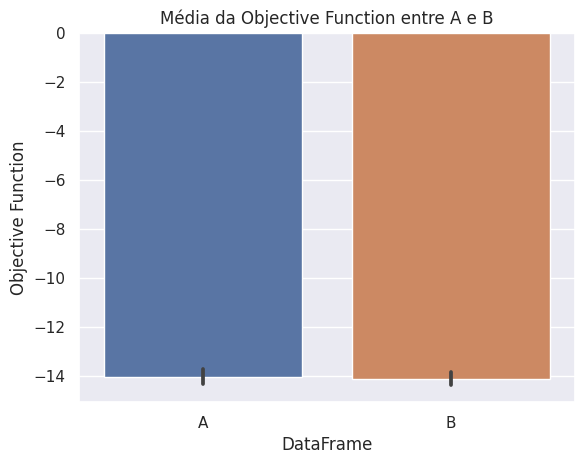

In [22]:
sns.barplot(x="DataFrame", y="Objective Function", data=data)
plt.title("Média da Objective Function entre A e B")
plt.show()

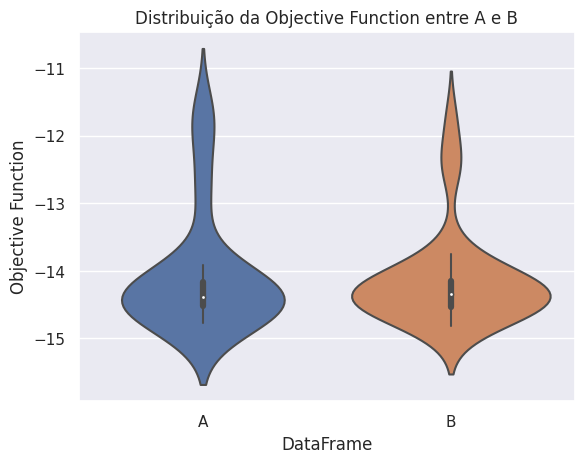

In [23]:
sns.violinplot(x="DataFrame", y="Objective Function", data=data)
plt.title("Distribuição da Objective Function entre A e B")
plt.show()

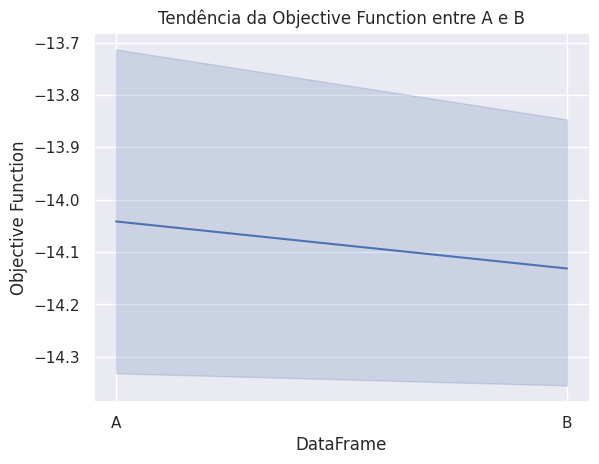

In [24]:
sns.lineplot(x="DataFrame", y="Objective Function", data=data)
plt.title("Tendência da Objective Function entre A e B")
plt.show()

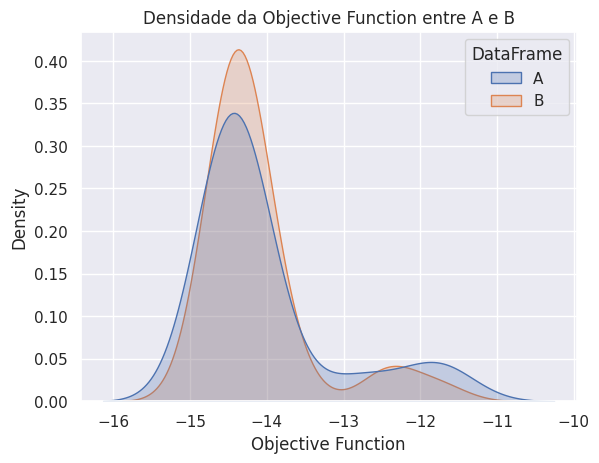

In [25]:
sns.kdeplot(data=data, x="Objective Function", hue="DataFrame", fill=True)
plt.title("Densidade da Objective Function entre A e B")
plt.show()

In [26]:
dictionary = {'mean': [mean_a, mean_b], 'min': [min_a, min_b], 'max': [max_a, max_b], 'std': [std_a, std_b]}

dic_df = pd.DataFrame(data=dictionary)
dic_df

,mean,min,max,std
0,-14.041672,-14.775820,-11.613466,0.892782
1,-14.131475,-14.808162,-11.760620,0.707969


<Axes: xlabel='mean'>

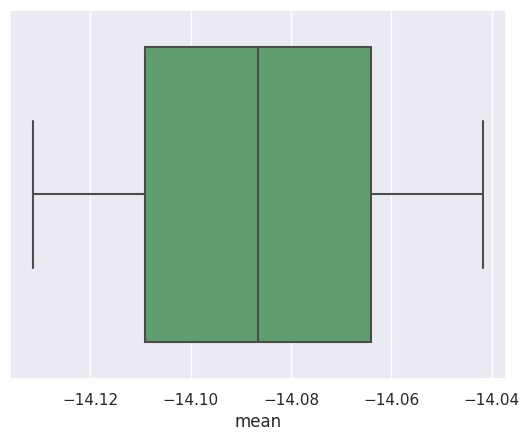

In [27]:
sns.boxplot(data=dic_df, x='mean', color='g')

<Axes: xlabel='min'>

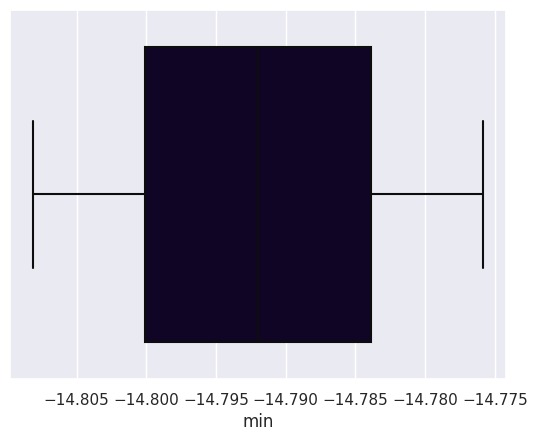

In [28]:
sns.boxplot(data=dic_df, x='min', color='#10002b')

<Axes: xlabel='max'>

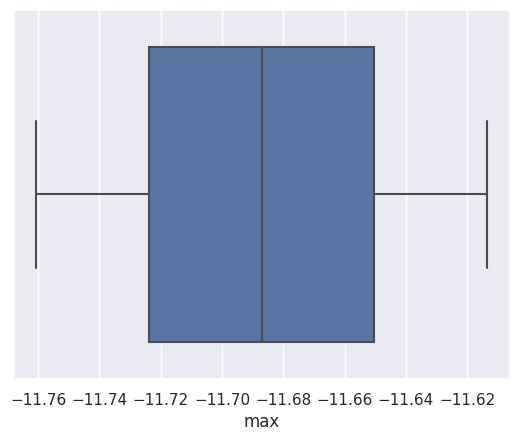

In [29]:
sns.boxplot(data=dic_df, x='max', color='b')

<Axes: xlabel='std'>

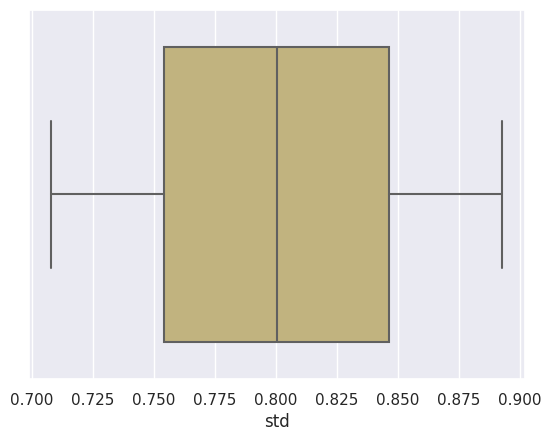

In [30]:
sns.boxplot(data=dic_df, x='std', color='y')


### 2) Problema com 2 variáveis de decisão ($x_1$ até $x_2$ ) e 5 restrições (2 de desigualdade e 3 de igualdade).

g05

$Minimize [3]$:

<center>

$$f(\overset{\rightarrow}{x}) =  3x_1 + 0.000001x³_1 + 2x_2 + (0.000002/3)x³_2 $$

</center>

subject to:

<center>

$$g_1(\overset{\rightarrow}{x})  =  -x_4 + x_3 - 0.55 \leq 0 $$

$$g_2(\overset{\rightarrow}{x}) = -x_3 + x_4 - 0.55 \leq 0 $$

$$h_3(\overset{\rightarrow}{x}) = 1000sin(-x_3 - 0.25) + 1000sin(-x_4 - 0.25) + 894.8 -x_1   = 0 $$

$$h_4(\overset{\rightarrow}{x}) = 1000sin(x_3 - 0.25) + 1000sin(x_3 - x_4 - 0.25) + 894.8 -x_2   = 0 $$

$$h_5(\overset{\rightarrow}{x}) = 1000sin(x_4 - 0.25) + 1000sin(x_4 - x_3 - 0.25) + 1294.8   = 0 $$

</center>

com

<center>

$$0 \leq x_1 \leq 1200, 0 \leq x_2 \leq 1200, -0.55 \leq x_3 \leq 0.55 and -0.55 \leq x_4 \leq 0.55$$

</center>


### Gráficos e análise dos resultados para o segundo problema
#### Lendo os dados

In [32]:
data_a = pd.read_csv("../out/2-results-a.csv")
data_b = pd.read_csv("../out/2-results-b.csv")

In [33]:
data = pd.concat(map(pd.read_csv, ["../out/2-results-a.csv", "../out/2-results-b.csv"]))

# Adicionar uma nova coluna indicando a qual DataFrame antigo pertence cada linha
df_identifiers = ['A'] * len(pd.read_csv("../out/2-results-a.csv")) + ['B'] * len(pd.read_csv("../out/2-results-b.csv"))
data['DataFrame'] = df_identifiers

data

,Objective Function,X1,X2,X3,X4,DataFrame
0,5159.300670,769.653457,922.974191,0.052374,-0.427088,A
1,5157.881720,581.422712,1123.587727,0.186847,-0.362313,A
2,5272.020249,513.408107,1199.663306,0.238699,-0.339700,A
3,5267.359160,846.628751,845.668600,-0.001179,-0.454049,A
4,5645.114650,999.919556,693.283359,-0.105015,-0.505303,A
5,5164.633334,775.637552,915.196679,0.047933,-0.427972,A
6,5229.955950,827.664791,868.183508,0.014422,-0.445582,A
7,5331.114487,884.096536,810.278188,-0.025893,-0.466133,A
8,5152.348742,766.112347,928.103345,0.055195,-0.425204,A
9,5700.858382,1019.203331,678.034755,-0.117320,-0.512489,A


In [34]:
df = pd.DataFrame(data=data)
df

,Objective Function,X1,X2,X3,X4,DataFrame
0,5159.300670,769.653457,922.974191,0.052374,-0.427088,A
1,5157.881720,581.422712,1123.587727,0.186847,-0.362313,A
2,5272.020249,513.408107,1199.663306,0.238699,-0.339700,A
3,5267.359160,846.628751,845.668600,-0.001179,-0.454049,A
4,5645.114650,999.919556,693.283359,-0.105015,-0.505303,A
5,5164.633334,775.637552,915.196679,0.047933,-0.427972,A
6,5229.955950,827.664791,868.183508,0.014422,-0.445582,A
7,5331.114487,884.096536,810.278188,-0.025893,-0.466133,A
8,5152.348742,766.112347,928.103345,0.055195,-0.425204,A
9,5700.858382,1019.203331,678.034755,-0.117320,-0.512489,A


### Geração dos gráficos

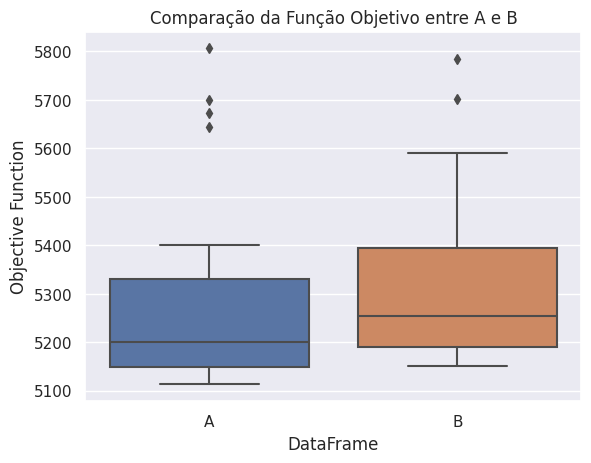

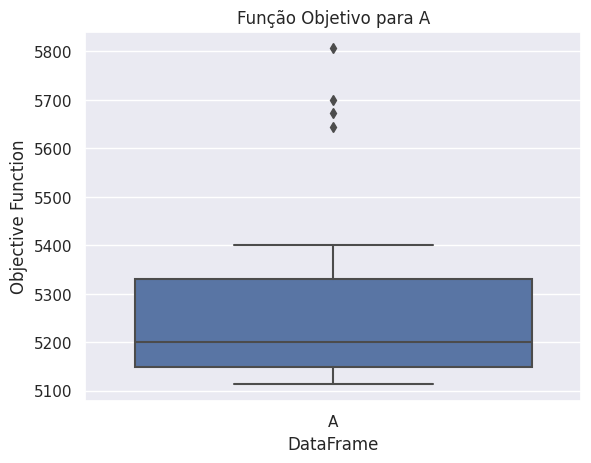

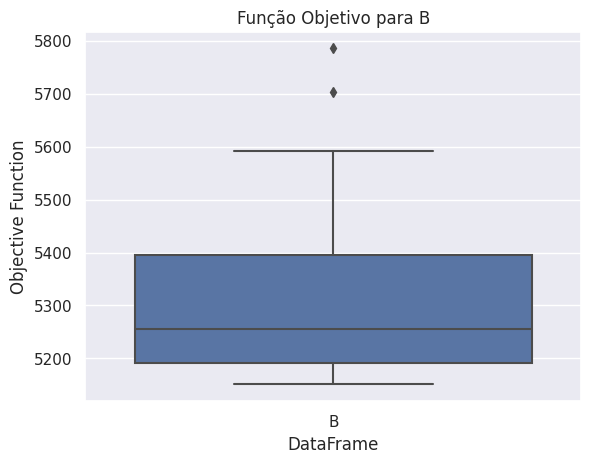

In [37]:
# Gráfico comparando A e B
sns.boxplot(x="DataFrame", y="Objective Function", data=data)
plt.title("Comparação da Função Objetivo entre A e B")
plt.show()

# Gráfico individual para A
sns.boxplot(x="DataFrame", y="Objective Function", data=data[data['DataFrame'] == 'A'])
plt.title("Função Objetivo para A")
plt.show()

# Gráfico individual para B
sns.boxplot(x="DataFrame", y="Objective Function", data=data[data['DataFrame'] == 'B'])
plt.title("Função Objetivo para B")
plt.show()

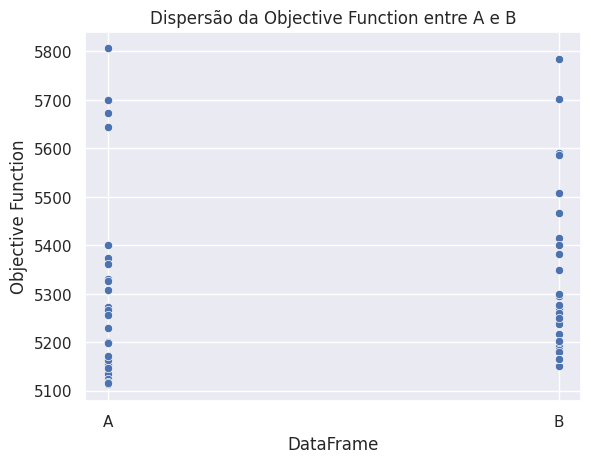

In [38]:
sns.scatterplot(x="DataFrame", y="Objective Function", data=data)
plt.title("Dispersão da Objective Function entre A e B")
plt.show()

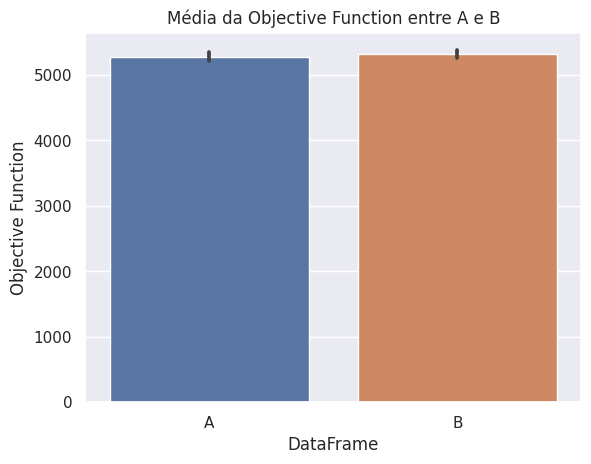

In [39]:
sns.barplot(x="DataFrame", y="Objective Function", data=data)
plt.title("Média da Objective Function entre A e B")
plt.show()

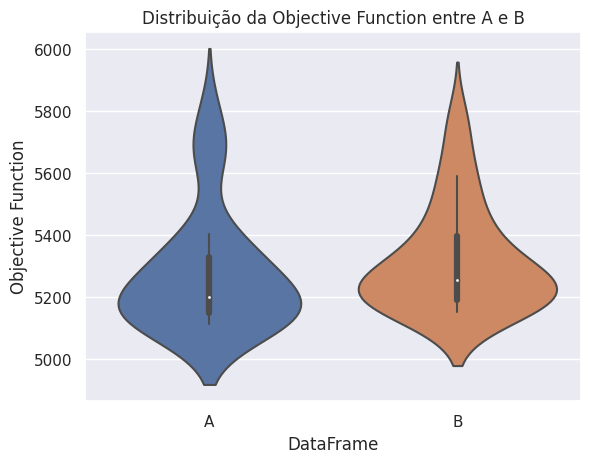

In [40]:
sns.violinplot(x="DataFrame", y="Objective Function", data=data)
plt.title("Distribuição da Objective Function entre A e B")
plt.show()

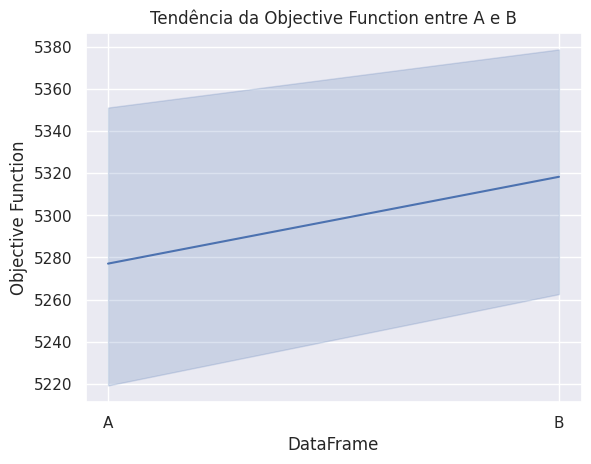

In [41]:
sns.lineplot(x="DataFrame", y="Objective Function", data=data)
plt.title("Tendência da Objective Function entre A e B")
plt.show()

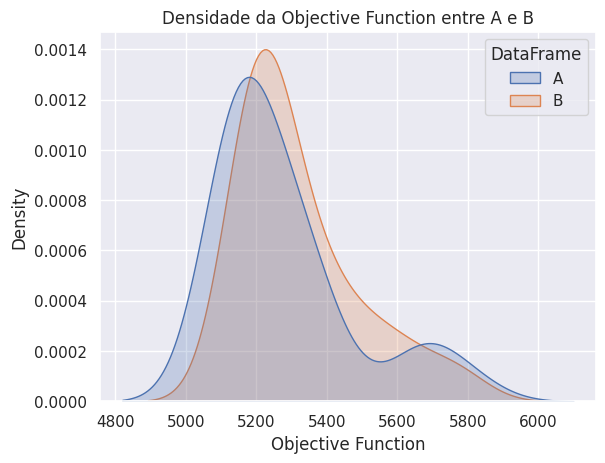

In [42]:
sns.kdeplot(data=data, x="Objective Function", hue="DataFrame", fill=True)
plt.title("Densidade da Objective Function entre A e B")
plt.show()

In [43]:
dictionary = {'mean': [mean_a, mean_b], 'min': [min_a, min_b], 'max': [max_a, max_b], 'std': [std_a, std_b]}

dic_df = pd.DataFrame(data=dictionary)
dic_df

,mean,min,max,std
0,5277.083191,5113.051204,5806.227962,192.512796
1,5318.310430,5150.840159,5785.387812,169.738142


<Axes: xlabel='mean'>

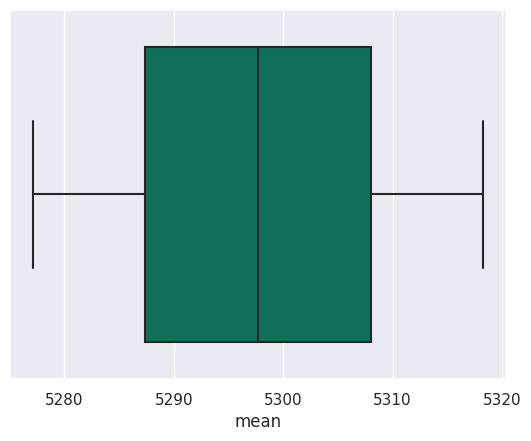

In [44]:
sns.boxplot(data=dic_df, x='mean', color='#007f5f')

<Axes: xlabel='min'>

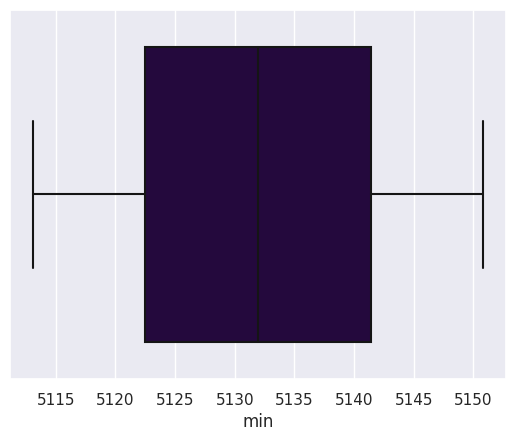

In [45]:
sns.boxplot(data=dic_df, x='min', color='#240046')

<Axes: xlabel='max'>

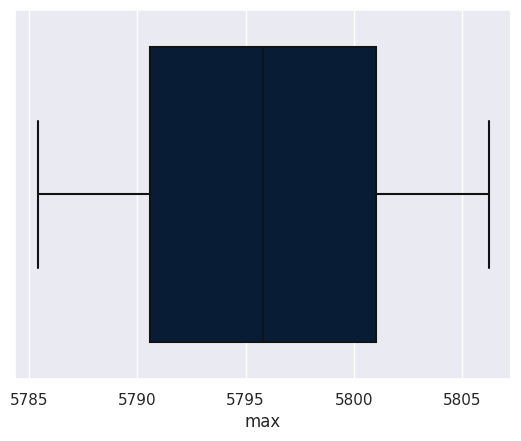

In [46]:
sns.boxplot(data=dic_df, x='max', color='#001d3d')

<Axes: xlabel='std'>

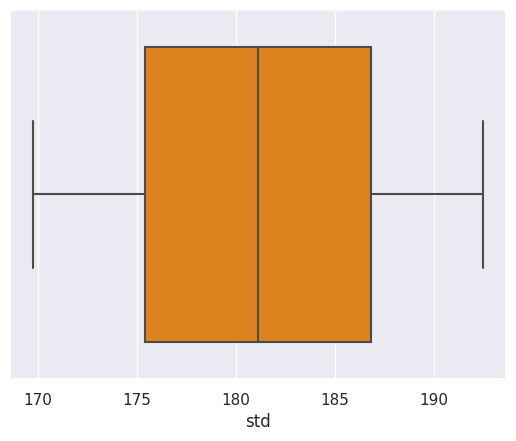

In [47]:
sns.boxplot(data=dic_df, x='std', color='#fb8500')